In [1]:
# Importing necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [4]:
# Set Seaborn style directly
sns.set_style("darkgrid")

In [5]:
# Defining functions
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def normal_distribution(mu=0, sigma=1):
    return stats.norm(mu, sigma)

In [7]:
# Function to calculate and plot distributions
def plot_distributions(mu_p, sigma_p, mu_q, sigma_q, n_samples=3000):
    p_x = normal_distribution(mu_p, sigma_p)
    q_x = normal_distribution(mu_q, sigma_q)
    
    x = np.linspace(mu_p - 4*sigma_p, mu_p + 4*sigma_p, 1000)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, p_x.pdf(x), label='p(x)', linewidth=2)
    plt.plot(x, q_x.pdf(x), label='q(x)', linewidth=2)
    plt.hist(p_x.rvs(n_samples), bins=50, density=True, alpha=0.3, label='p(x) samples')
    plt.hist(q_x.rvs(n_samples), bins=50, density=True, alpha=0.3, label='q(x) samples')
    plt.title(f"Distributions: p(x) ~ N({mu_p}, {sigma_p}²), q(x) ~ N({mu_q}, {sigma_q}²)")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.show()
    
    return p_x, q_x

In [8]:
# Function to estimate value using importance sampling
def estimate_value(p_x, q_x, n_samples=5000):
    samples = q_x.rvs(n_samples)
    values = logistic_function(samples) * (p_x.pdf(samples) / q_x.pdf(samples))
    return np.mean(values), np.var(values)


## Importance Sampling Analysis

### Scenario 1: Similar Distributions


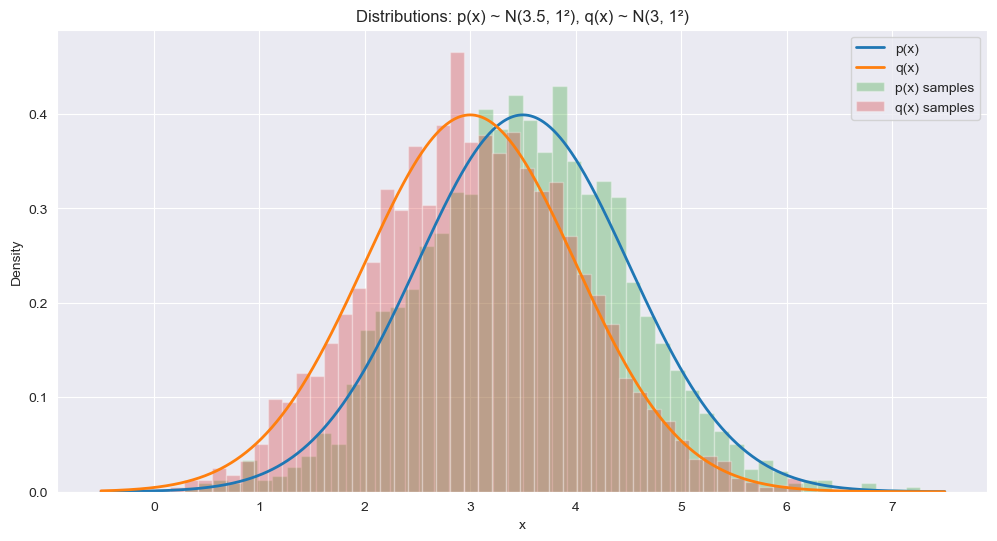

Estimated value: 0.9419
Variance: 0.2903


In [9]:
# Main analysis
print("## Importance Sampling Analysis")

print("\n### Scenario 1: Similar Distributions")
p_x, q_x = plot_distributions(mu_p=3.5, sigma_p=1, mu_q=3, sigma_q=1)
mean, variance = estimate_value(p_x, q_x)
print(f"Estimated value: {mean:.4f}")
print(f"Variance: {variance:.4f}")



### Scenario 2: Dissimilar Distributions


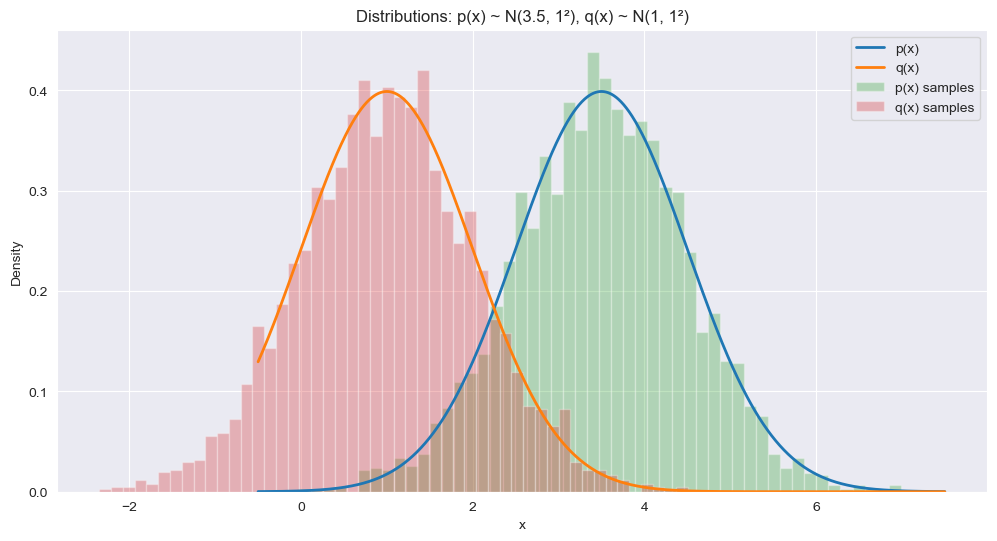

Estimated value: 0.9426
Variance: 63.8760


In [10]:
print("\n### Scenario 2: Dissimilar Distributions")
p_x, q_x = plot_distributions(mu_p=3.5, sigma_p=1, mu_q=1, sigma_q=1)
mean, variance = estimate_value(p_x, q_x)
print(f"Estimated value: {mean:.4f}")
print(f"Variance: {variance:.4f}")


In [15]:
# Visualizing the impact of sample size on estimation
def analyze_sample_size_impact(p_x, q_x, max_samples=10000, step=500):
    sample_sizes = range(step, max_samples + step, step)
    means = []
    variances = []
    
    for n in sample_sizes:
        mean, var = estimate_value(p_x, q_x, n)
        means.append(mean)
        variances.append(var)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, means, marker='o', color='blue')
    plt.title("Estimated Value vs. Sample Size")
    plt.xlabel("Sample Size")
    plt.ylabel("Estimated Value")
    
    plt.subplot(1, 2, 2)
    plt.plot(sample_sizes, variances, marker='o', color='orange')
    plt.title("Variance vs. Sample Size")
    plt.xlabel("Sample Size")
    plt.ylabel("Variance")
    
    plt.tight_layout()
    plt.show()

# # Example usage
# p_x = normal_distribution(3.5, 1)
# q_x = normal_distribution(3, 1)
# analyze_sample_size_impact(p_x, q_x)


### Impact of Sample Size on Estimation


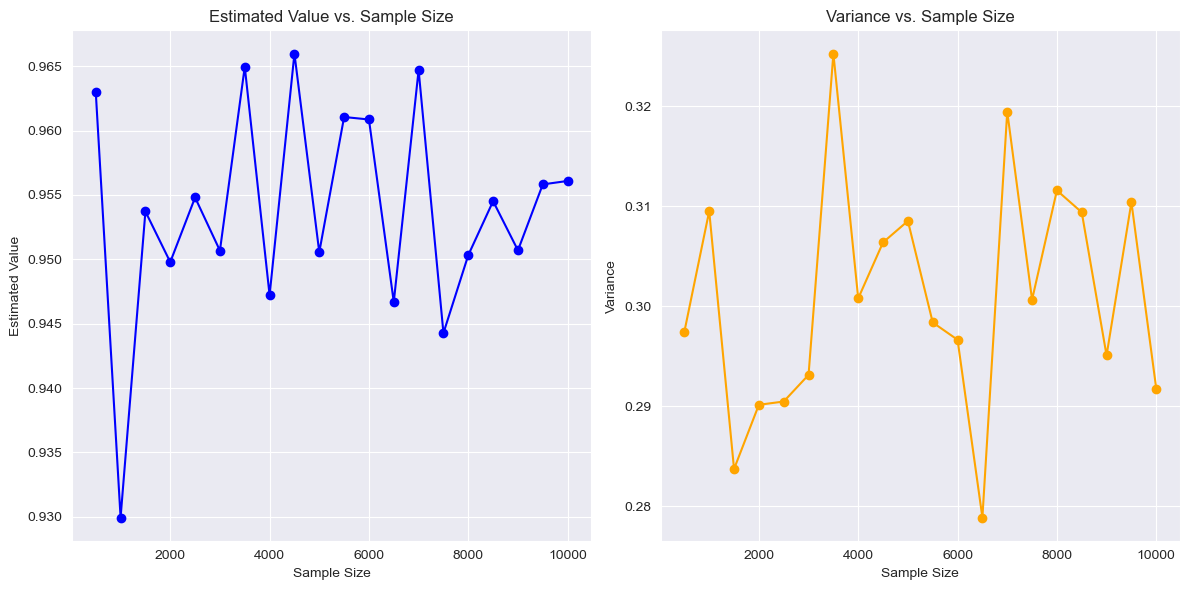

In [16]:
print("\n### Impact of Sample Size on Estimation")
analyze_sample_size_impact(p_x, q_x)


### Visualizing Importance Weights


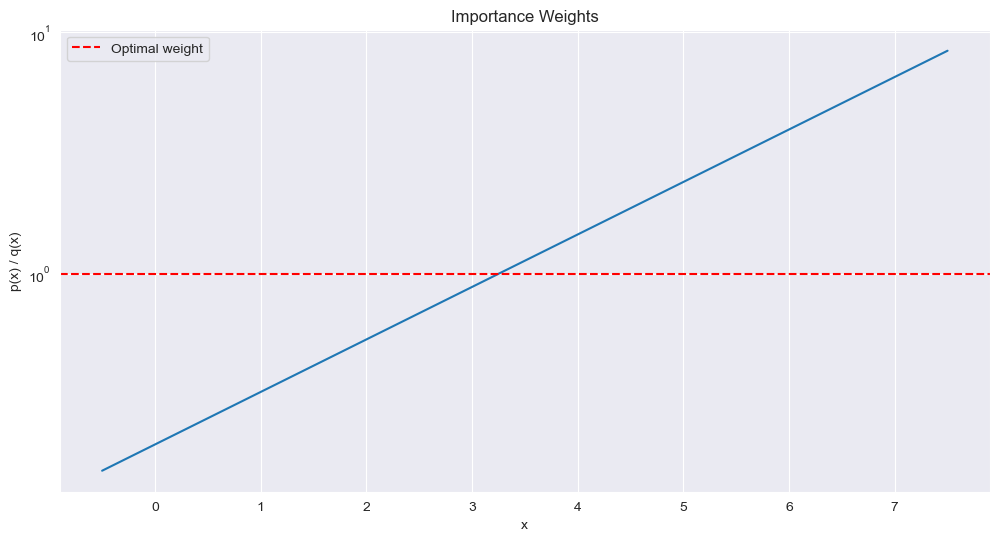

In [17]:
# Visualizing the importance weights
def visualize_importance_weights(p_x, q_x):
    x = np.linspace(p_x.mean() - 4*p_x.std(), p_x.mean() + 4*p_x.std(), 1000)
    importance_weights = p_x.pdf(x) / q_x.pdf(x)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, importance_weights)
    plt.title("Importance Weights")
    plt.xlabel("x")
    plt.ylabel("p(x) / q(x)")
    plt.yscale('log')
    plt.axhline(y=1, color='r', linestyle='--', label='Optimal weight')
    plt.legend()
    plt.show()

print("\n### Visualizing Importance Weights")
visualize_importance_weights(p_x, q_x)